In [17]:
# Importing packages
import numpy as np
from tqdm import tqdm
import itertools
from sympy import solve, symbols

# Importing matplotlib
import matplotlib.pyplot as plt

# Importing Pauli matrices
from pauli_matrices.pauli_matrices import I, X, Y, Z

# Importing figure properties
from figure_test_files.figure_properties import *

# Importing functions
from hamiltonian.hamiltonian import get_hamiltonian
from Bell_operator.Bell_operator import get_Bell_operator
from Bell_operator.coefficients import get_coefficients, get_system_of_equations
from classical_optimization.classical_optimization import classical_optimization
from correlation_matrix.correlation_matrix import get_correlation_matrix, get_correlation_matrix_symbolic

In [2]:
# Defining the number of qubits
N = 2

# Defining the Hamiltonian
H = np.sqrt(2)*(np.kron(Z, Z) + np.kron(X, X))

# Calculating the eigenvalues and eigenstates
eig_vals, eig_vecs = np.linalg.eigh(H)

# extracting the ground state energy and the respective eigenstate
psi_G = eig_vecs[:,0]
psi_G_dagger = np.conjugate(np.transpose(psi_G))

In [16]:
# Defining the number of measurements
m = 2

# Defining angles
angles = np.linspace(0, np.pi, 2000)

# Initializing classical bound
beta_C = []

# Calculating classical bounds
for theta in tqdm(angles):

    # Initializing the M matrix
    measurement_angles = np.zeros((N, m))

    # Adding the angle between the different parties
    if type(theta) == int or type(theta) == float or type(theta) == np.int0 or type(theta) == np.float64:
        measurement_angles[1,:] = theta
    else:
        for i in range(1,N):
            measurement_angles[i,:] = theta[i-1]

    # Adding angles of the measurements of a respectve party
    for j in range(m):
        measurement_angles[:,j] += (j+1)*np.pi/m

    # Obtaining the general correlation matrix
    M = get_correlation_matrix(measurement_angles, N, m)

    # Obtaining the Bell operator in its matrix form and the coefficients as sympy objects
    B, var_dict = get_Bell_operator(M, m, N)

    # Obtaining the system of equations and solving them
    var_dict = get_coefficients(B, H, var_dict, N)

    # Obtaining the classical bound with the recursive algorithm
    beta_C.append( classical_optimization(var_dict, N, m) )


100%|██████████| 2000/2000 [17:57<00:00,  1.86it/s]


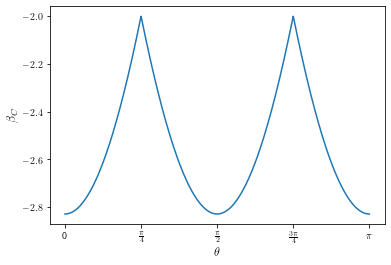

In [27]:
save_dir = '../data/figures/'
fig, ax = plt.subplots()
ax.plot(angles, beta_C)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\beta_C$')
ax.set_xticks([0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi])
ax.set_xticklabels(['0', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3 \pi}{4}$', r'$\pi$'])
fig.savefig(save_dir + 'classical_bound_toy_model_varying_basis.png', dpi = 300, bbox_inches='tight');

In [21]:
# Defining the number of measurements
m = 2

# Defining angle variable
theta = np.pi/2        # angle between same measurement of different parties 

# # Defining angle constants
# theta_party = np.pi/2  # angle between measurments of the same party
# theta_relative = 0     # relative angle the first measurement of the first party

# Still need to automate this one
# maybe make it so we first initialize the M matrix in a normal matter and later add the Z gates as an m+1 measurement
# And then finally add 1 extra measurement to the value of m such that it is in line with the rest of the code

# # Defining meaurement angles
# measurement_angles = np.array([theta_relative + theta_party, theta_relative]*2, dtype='float64')
# measurement_angles[2:] += np.array([theta]*2)
# measurement_angles = np.reshape(measurement_angles, (N, m))

# Initializing the M matrix
measurement_angles = np.zeros((N, m))

# Adding the angle between the different parties
if type(theta) == int or type(theta) == float:
    measurement_angles[1,:] = theta
else:
    for i in range(1,N):
        measurement_angles[i,:] = theta[i-1]

# Adding angles of the measurements of a respectve party
for j in range(m):
    measurement_angles[:,j] += (j+1)*np.pi/m

# Obtaining the general correlation matrix
M, variables = get_correlation_matrix(measurement_angles, N, m)

# for i in range(N):
#     for j in range(1,m+1):
#         for k in range(2):
#             for l in range(2):
#                 for var in variables.keys():
#                     if var[0] == 'x':
#                         M[i,j][k,l] = M[i,j][k,l].subs( variables[var], np.cos( measurement_angles[int(var[3]), int(var[4])] ) )
#                     elif var[0] == 'y':
#                         M[i,j][k,l] = M[i,j][k,l].subs( variables[var], np.sin( measurement_angles[int(var[3]), int(var[4])] ) )

# Obtaining the Bell operator in its matrix form and the coefficients as sympy objects
B, var_dict = get_Bell_operator(M, m, N)

# Obtaining the system of equations and solving them
var_dict = get_coefficients(B, H, var_dict, N)

# Inserting the angles into the coefficients
# for key in var_dict.keys():
#     for var in variables.keys():
#         if var[0] == 'x':
#             var_dict[key] = var_dict[key].subs( variables[var], np.cos( measurement_angles[int(var[3]), int(var[4])] ) )
#         elif var[0] == 'y':
#             var_dict[key] = var_dict[key].subs( variables[var], np.sin( measurement_angles[int(var[3]), int(var[4])] ) )

# Obtaining the classical bound with the recursive algorithm
beta_C = classical_optimization(var_dict, N, m)
beta_C

In [10]:
# Obtaining the Bell operator 
for i in range(2**N):
    for j in range(2**N):
        for variable in var:
            B[i,j] = B[i,j].subs(variable, ans[variable])

# Calculting the quantum value
beta_Q = np.matmul(psi_G_dagger, np.matmul(B, psi_G))


In [7]:
print(r'beta_Q = %.3f and beta_C = %.3f' %(beta_Q, beta_C))

beta_Q = -2.000 and beta_C = 2.828
